# Global Rise of Women's Education

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators.  The following Gapminder indicators will be evaluated in this project:

- Mean years in school (women 25 and older): the average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
- Mean years in school (women aged 25 to 34 as % men of same age): the average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
- Infant mortality rate: the probability that a child born in a specific year will die before reaching the age of one, expressed as a rate of 1,000 live births.  

>For this project, the mean years of schooling for women across several countries will be compared, as well as the mean years in school for women as a percent of men in those countries.  Additionally, the impact of women's education on a country's infant mortality rate will be evaluated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load Gapminder indicators
women_df = pd.read_csv('Years in school women 25 plus.csv', index_col=0)
ratio_df = pd.read_csv('Years in school, women 25 to 34 as percent of men.csv', index_col=0)
infant_df = pd.read_csv('indicator gapminder infant_mortality.csv', index_col=0, encoding='latin1')

In [3]:
# view dimensions of women dataset
women_df.shape

(175, 40)

In [4]:
# view women dataset
women_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Row Labels,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,4.9,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4
Algeria,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,...,3.0,3.1,3.2,3.4,3.5,3.6,3.8,3.9,4.0,4.2
Angola,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,...,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8
Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.7,7.8,8.0,8.1,8.3,...,11.2,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2


In [5]:
# view dimension of ratio dataset
ratio_df.shape

(175, 40)

In [6]:
# view ratio dataset
ratio_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Row Labels,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.1,11.1,10.0,9.1,9.1,8.3,8.3,7.7,7.7,7.1,...,14.8,14.8,14.3,13.8,17.2,16.7,16.1,16.1,18.8,18.8
Albania,101.7,101.6,100.0,100.0,100.0,100.0,98.6,98.6,98.6,98.7,...,100.0,100.0,100.0,101.0,101.0,100.0,100.9,100.9,101.9,101.9
Algeria,77.8,78.9,80.0,81.0,81.8,82.6,83.3,80.8,85.2,85.7,...,93.5,95.2,95.3,95.4,97.0,97.0,97.1,97.1,97.1,98.6
Angola,47.6,50.0,47.8,50.0,48.0,50.0,48.1,50.0,50.0,48.4,...,66.7,67.3,67.9,69.6,70.2,70.7,72.4,72.9,73.3,75.0
Antigua and Barbuda,103.8,105.1,104.9,104.8,106.0,105.8,105.7,106.7,106.6,107.6,...,109.2,109.2,109.1,108.2,108.1,108.1,108.9,108.0,107.9,107.9


In [7]:
# view dimensions of infant dataset
infant_df.shape

(260, 216)

In [8]:
# view infant dataset
infant_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Infant mortality rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.3,80.4,78.6,76.8,75.1,73.4,71.7,69.9,68.1,66.3
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.4,16.7,16.0,15.4,14.8,14.3,13.8,13.3,12.9,12.5
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,26.4,25.3,24.3,23.5,22.8,22.4,22.1,22.0,21.9


In [9]:
# confirm women and ratio datasets have the same column labels (i.e., data for the same years)
(women_df.columns == ratio_df.columns).all()

True

In [10]:
# confirm women and ratio datasets have the same row labels (i.e., data for same countries)
(women_df.index == ratio_df.index).all()

True

In [11]:
# view type of data for women dataset
women_df.dtypes

1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
dtype: object

In [12]:
# view type of data for ratio dataset
ratio_df.dtypes

1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
dtype: object

In [13]:
# view type of data for infant dataset
infant_df.dtypes

1800    float64
1801    float64
1802    float64
1803    float64
1804    float64
1805    float64
1806    float64
1807    float64
1808    float64
1809    float64
1810    float64
1811    float64
1812    float64
1813    float64
1814    float64
1815    float64
1816    float64
1817    float64
1818    float64
1819    float64
1820    float64
1821    float64
1822    float64
1823    float64
1824    float64
1825    float64
1826    float64
1827    float64
1828    float64
1829    float64
         ...   
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
Length: 216, dtype: obje

In [14]:
# view missing value count for each feature in women dataset
women_df.isnull().sum()

1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
dtype: int64

In [15]:
# view missing value count for each feature in ratio dataset
ratio_df.isnull().sum()

1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
dtype: int64

In [16]:
# view missing value count for each feature in infant dataset
infant_df.isnull().sum()

1800    259
1801    259
1802    259
1803    259
1804    259
1805    259
1806    258
1807    258
1808    258
1809    258
1810    258
1811    258
1812    258
1813    258
1814    258
1815    258
1816    258
1817    258
1818    258
1819    258
1820    258
1821    258
1822    258
1823    258
1824    258
1825    258
1826    258
1827    258
1828    258
1829    258
       ... 
1986     63
1987     63
1988     63
1989     61
1990     57
1991     59
1992     59
1993     60
1994     60
1995     60
1996     60
1997     60
1998     60
1999     60
2000     60
2001     60
2002     60
2003     60
2004     60
2005     60
2006     61
2007     61
2008     61
2009     65
2010     65
2011     65
2012     65
2013     65
2014     65
2015     65
Length: 216, dtype: int64

### Data Cleaning

Each dataset has a different name of the axis for the index, so let's first rename each axis for the index to "country."

In [17]:
# rename index of each dataset to "country"
women_df.rename_axis('country', inplace=True)
ratio_df.rename_axis('country', inplace=True)
infant_df.rename_axis('country', inplace=True)

We confirmed above that the women and ratio datasets each included data between the years 1970 to 2009.  However, the infant dataset included additional data between the years 1800 to 2015.  So, next, let's select a subset of the infant dataset from the years 1970 to 2009 so that it aligns with the women and ratio datasets. 

In [18]:
# select only columns 1970 to 2009 from infant dataset
infant_df = infant_df.loc[:,'1970':'2009']

We also confirmed above that the women and ratio datasets did not include any null data values.  However, the infant database included many null values.  So, let's remove all of the rows with null values from the infant dataset.

In [19]:
# drop rows having null values from infant dataset
infant_df.dropna(inplace=True)

All of the data in the women and ratio datasets is of type 'float.'  The majority of the data in the infant dataset is also of type 'float' except for the data for years 1970 and 1980.  So, let's convert the data for years 1970 and 1980 to 'float.' 

In [20]:
# convert 1970 and 1980 columns to floats
yr_columns = ['1970', '1980']
for yr in yr_columns:
    infant_df[yr] = infant_df[yr].astype(float)

The women and ratio datasets included data for the same 175 countries.  However, the infant dataset included data for 260 countries, which may not include the countries from the women and ratio datasets.  So, now let's identify the countries that are included in all three of the datasets.

In [21]:
# merge women and infant datasets to obtain list of countries common to each dataset
countries_df = women_df.merge(infant_df,on='country')
countries = countries_df.index.tolist()

Now that we have obtained the list of countries that are common to each of the datasets, let's filter the datasets so that each dataset only includes data associated with those countries.

In [22]:
# select data from infant dataset that is associated with each of the countries
infant_df = infant_df.loc[countries]

In [23]:
# confirm new dimensions of the infant dataset
print(infant_df.shape)
infant_df.head()

(132, 40)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,206.1,202.2,198.2,194.3,190.3,186.6,182.6,178.7,174.5,170.4,...,95.4,93.4,91.2,89.0,86.7,84.4,82.3,80.4,78.6,76.8
Albania,76.8,74.1,71.0,68.3,65.8,63.1,60.8,58.6,73.0,68.4,...,23.2,22.1,21.0,20.0,19.1,18.3,17.4,16.7,16.0,15.4
Algeria,146.0,143.6,140.6,137.0,133.0,128.7,124.0,119.0,113.6,107.8,...,33.9,33.3,32.4,31.3,30.1,28.8,27.6,26.4,25.3,24.3
Argentina,59.5,58.8,58.0,56.8,55.2,53.2,50.5,47.2,43.8,40.3,...,18.0,17.6,17.1,16.6,16.0,15.3,14.6,14.1,13.7,13.4
Australia,17.8,17.4,16.8,16.2,15.3,14.4,13.5,12.7,12.0,11.3,...,5.1,5.0,5.0,4.9,4.9,4.8,4.7,4.5,4.4,4.2


In [24]:
# select data from women dataset that is associated with each of the countries
women_df = women_df.loc[countries]

In [25]:
# confirm new dimensions of women dataset
print(women_df.shape)
women_df.head()

(132, 40)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,4.9,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4
Algeria,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,...,3.0,3.1,3.2,3.4,3.5,3.6,3.8,3.9,4.0,4.2
Argentina,5.5,5.6,5.7,5.9,6.0,6.1,6.2,6.3,6.5,6.6,...,9.1,9.2,9.3,9.4,9.5,9.6,9.8,9.9,10.0,10.1
Australia,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,...,10.9,11.0,11.1,11.1,11.2,11.3,11.3,11.4,11.4,11.5


In [26]:
# select data from ratio dataset that is associated with each of the countries
ratio_df = ratio_df.loc[countries]

In [27]:
# confirm new dimensions of ratio dataset
print(ratio_df.shape)
ratio_df.head()

(132, 40)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.1,11.1,10.0,9.1,9.1,8.3,8.3,7.7,7.7,7.1,...,14.8,14.8,14.3,13.8,17.2,16.7,16.1,16.1,18.8,18.8
Albania,101.7,101.6,100.0,100.0,100.0,100.0,98.6,98.6,98.6,98.7,...,100.0,100.0,100.0,101.0,101.0,100.0,100.9,100.9,101.9,101.9
Algeria,77.8,78.9,80.0,81.0,81.8,82.6,83.3,80.8,85.2,85.7,...,93.5,95.2,95.3,95.4,97.0,97.0,97.1,97.1,97.1,98.6
Argentina,101.5,102.9,101.4,102.8,102.7,102.7,102.6,102.6,103.8,103.8,...,107.9,107.8,108.7,108.7,109.6,109.5,109.4,110.4,110.3,111.2
Australia,99.0,99.0,99.0,99.0,99.0,100.0,99.0,99.0,99.1,99.1,...,100.8,101.7,100.8,101.7,101.7,101.7,101.7,102.5,102.5,103.3


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Has the level of women's education been increasing in certain countries better than others?

In [28]:
# explore Mean Years in School for Women dataset
women_df.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2.728788,2.816667,2.900000,2.990152,3.081061,3.174242,3.268182,3.362879,3.457576,3.559848,...,5.875000,5.993182,6.113636,6.234848,6.356818,6.474242,6.605303,6.725758,6.843182,6.968182
std,2.558552,2.606895,2.657899,2.705941,2.748466,2.796006,2.852462,2.892354,2.938560,2.982285,...,3.636737,3.655618,3.675892,3.684463,3.701499,3.719776,3.730487,3.738854,3.751991,3.755735
min,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.200000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.400000
25%,0.600000,0.600000,0.675000,0.700000,0.700000,0.800000,0.800000,0.900000,0.900000,1.000000,...,2.800000,2.875000,3.050000,3.150000,3.200000,3.275000,3.375000,3.550000,3.675000,3.775000
50%,1.600000,1.650000,1.750000,1.900000,2.050000,2.150000,2.200000,2.300000,2.400000,2.500000,...,5.550000,5.700000,5.800000,5.900000,6.050000,6.200000,6.400000,6.600000,6.800000,6.900000
75%,4.725000,4.925000,5.025000,5.150000,5.275000,5.450000,5.575000,5.675000,5.850000,5.975000,...,9.025000,9.200000,9.300000,9.400000,9.500000,9.600000,9.725000,9.825000,10.000000,10.100000
max,11.000000,11.100000,11.200000,11.300000,11.400000,11.500000,11.600000,11.700000,11.800000,11.900000,...,13.500000,13.600000,13.600000,13.700000,13.800000,13.900000,14.000000,14.100000,14.100000,14.200000


Each dataset now includes data for 130 countries.  To reduce clutter on the graph, let's only select data from the women dataset associated with countries having the least and most mean years of schooling for women, as well as random countries from the 1st, 2nd, 3rd, and 4th quartiles.  Let's also select data from the home country (USA) for comparision.

In [29]:
# initialize lists
c1 = []
w1 = []

In [30]:
# select countries for graphing purposes
c1.append(women_df['2009'].idxmin())
c1.append(women_df[(women_df['2009'] <= women_df['2009'].quantile(.25)) & (women_df['2009'] > women_df['2009'].min())]['2009'].sample().index[0])
c1.append(women_df[(women_df['2009'] <= women_df['2009'].quantile(.5)) & (women_df['2009'] > women_df['2009'].quantile(.25))]['2009'].sample().index[0])
c1.append(women_df[(women_df['2009'] <= women_df['2009'].quantile(.75)) & (women_df['2009'] > women_df['2009'].quantile(.5))]['2009'].sample().index[0])
c1.append(women_df[(women_df['2009'] > women_df['2009'].quantile(.75)) & (women_df['2009'] < women_df['2009'].max())]['2009'].sample().index[0])
c1.append(women_df['2009'].idxmax())
c1.append('United States')
c1

['Afghanistan',
 'Mauritania',
 'Tanzania',
 'Lebanon',
 'Sweden',
 'Canada',
 'United States']

In [31]:
# obtain data from women dataset associated with selected countries
for c in c1:
    w1.append(women_df.loc[c])

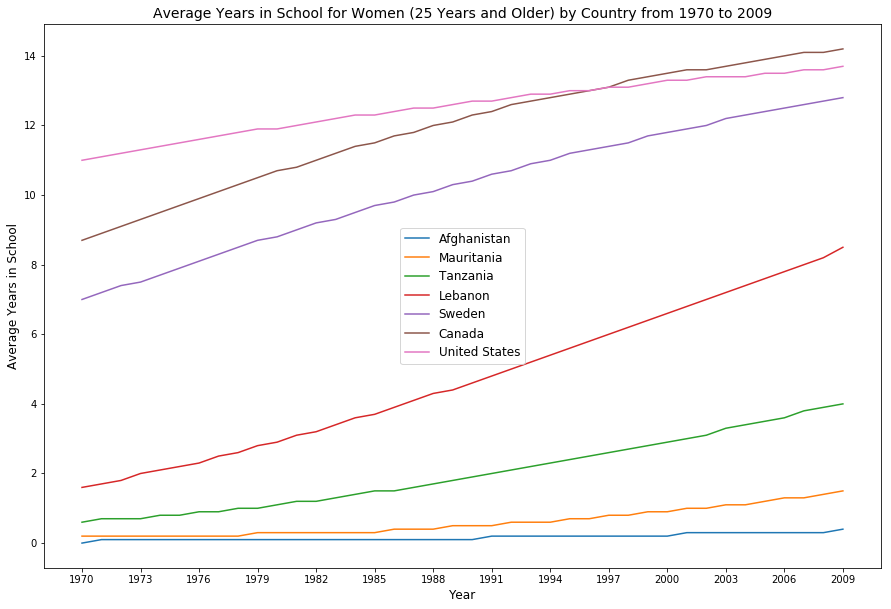

In [32]:
# line plots
fig = plt.figure(figsize=[15,10])

for i in range(7):
    plt.plot(w1[i].index, w1[i])

# title and labels
plt.ylabel('Average Years in School', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Average Years in School for Women (25 Years and Older) by Country from 1970 to 2009', fontsize=14)
plt.xticks(np.arange(0, 40, 3))
plt.legend(loc='best', fontsize=12);

### Q2: How have gender inequalities in education evolved over time?

Now, let's graph the Mean Years of Schooling for Women as % of Men for only the countries selected in Q1 above.  Let's compare data in year 1970 to data in year 2009 from the ratio dataset for each country to show change over time.

In [33]:
# initalize lsit
r = []

In [34]:
# obtain data from ratio dataset associated with selected countries
for c in c1:
    r.append(ratio_df.loc[c])

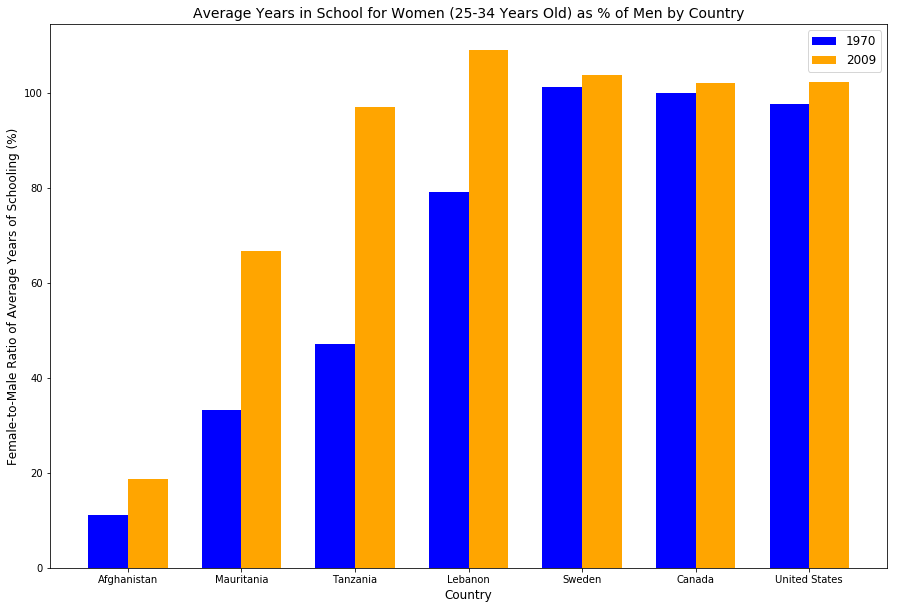

In [35]:
# line plots
fig = plt.figure(figsize=[15,10])
width = 0.35

for i in range(7):
    plt.bar(i - width/2, r[i].loc['1970'], width, color='blue')
    plt.bar(i + width/2, r[i].loc['2009'], width, color='orange')

# title and labels
plt.ylabel('Female-to-Male Ratio of Average Years of Schooling (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Average Years in School for Women (25-34 Years Old) as % of Men by Country', fontsize=14)
plt.xticks(np.arange(0, 7), c1)
plt.legend(['1970', '2009'], loc='best', fontsize=12);

### **Q3: Does the level of women's education correlate with infant mortality rates?**

Finally, let's graph data from the infant dataset vs. data from the women dataset.  Let's only select a random sample of 25 countries for analysis to reduce clutter on the graph.

In [36]:
# initialize lists
c2 = []
w2 = []
inf = []

In [37]:
# select 25 random countries
random_df = women_df.sample(n=25)
c2 = random_df.index.tolist()
c2

['Maldives',
 'Guinea',
 'Benin',
 'Netherlands',
 'Spain',
 'Ecuador',
 'Afghanistan',
 'Rwanda',
 'Kuwait',
 'Kiribati',
 'Jamaica',
 'Marshall Islands',
 'Costa Rica',
 'New Zealand',
 'Portugal',
 'Thailand',
 'Papua New Guinea',
 'Haiti',
 'Sudan',
 'Venezuela',
 'Kenya',
 'Australia',
 'Lesotho',
 'Burkina Faso',
 'Iraq']

In [38]:
# obtain data representing Mean Years of School for Women and Infant Mortality Rate for the random selection of countries
for c in c2:
    w2.append(women_df.loc[c])
    inf.append(infant_df.loc[c])

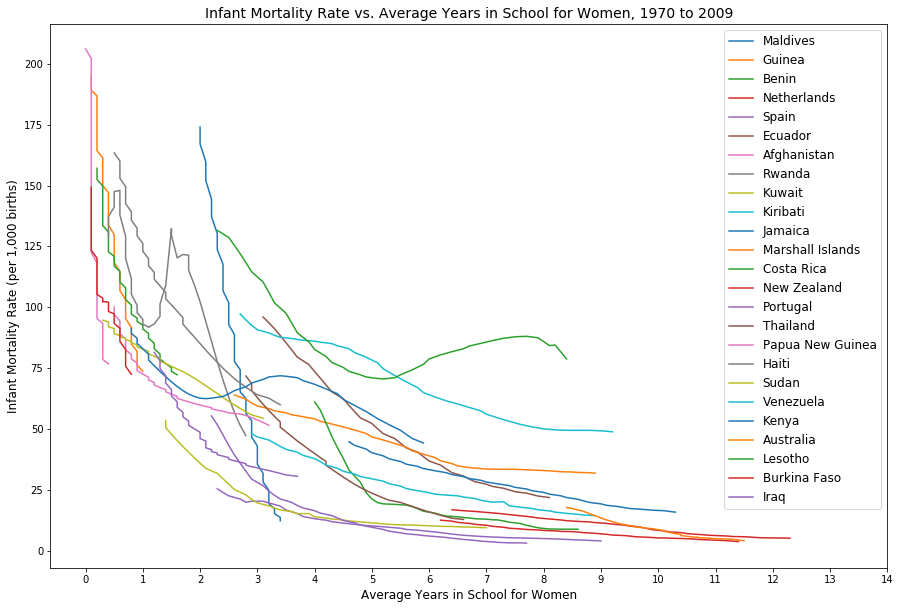

In [39]:
# line plots
fig = plt.figure(figsize=[15,10])

for i in range(25):
    plt.plot(w2[i], inf[i])

# title and labels
plt.ylabel('Infant Mortality Rate (per 1,000 births)', fontsize=12)
plt.xlabel('Average Years in School for Women', fontsize=12)
plt.title('Infant Mortality Rate vs. Average Years in School for Women, 1970 to 2009', fontsize=14)
plt.xticks(np.arange(0, 15, 1))
plt.legend(loc='best', fontsize=12);

<a id='conclusions'></a>
## Conclusions

For purposes of this project, any data associated with a country whose name was not included in all three of the Gapminder datasets was removed.  However, this did not account for any spelling errors or abbreviations in the name of a country.  Therefore, some countries may have been removed from consideration even though data for the country was included in all three datasets.  Additionally, any country having at least one missing datapoint in the infant dataset was removed from consideration.  However, even after filtering the data, data from 130 countries was still analysed over the time period from 1970 to 2009, which is believed to be a sufficient amount of data from which to draw conclusions.

As illustrated above, the average number of years that women spend in school has been going up across the globe.  

There has also been an upward trend in the gender ratios, which indicates that the inequality between men and women in education has been declining. In fact, the gender gaps in countries like Canada and the United States have already been closed completely, with the gender ratios exceeding the 100% benchmark for education gender equality.

Women's education is inversely correlated with infant mortality.  Across the world, the infant mortality rate decreases as the average number of years that women spent in school increases.